# Yuyu Fan & Yining Shen

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [1]:
class logisticRegression:
 def __init__(self, file_xTr, file_yTr, file_xVal, file_yVal,
   maxIt=300, eta=0.01):
   self.xTr=file_xTr
   self.yTr=file_yTr
   self.xVal=file_xVal
   self.yVal=file_yVal
   print('finish loading data')
   self.preProcess()
   self.w=np.zeros(self.xTr.shape[1])

   self.lam=0.0001
   self.eta=eta
   self.maxIt=maxIt
    
 def preProcess(self):
   xStd=np.std(self.xTr, axis=0)
   mask=(xStd!=0.)
   self.xTr=self.xTr[:, mask]
   meanX=np.mean(self.xTr, axis=0)
   stdX=np.std(self.xTr, axis=0)
   self.xTr=(self.xTr-meanX)/stdX
   self.xVal=self.xVal[:, mask]
   self.xVal=(self.xVal-meanX)/stdX
   self.xTr=np.insert(self.xTr, 0, 1., axis=1)
   self.xVal=np.insert(self.xVal, 0, 1., axis=1)
   self.yTr[self.yTr==-1.]=0.
   self.yVal[self.yVal==-1.]=0.
   print('finish preprocessing data')

 def gradient(self):
   wx=np.sum(self.xTr*self.w, axis=1)
   exp_wx=np.exp(wx)
   print
   grad=np.sum((self.yTr-exp_wx/(1.+exp_wx))*(self.xTr).T, axis=1)
   return grad

 def update(self):
  grad=self.gradient()
  self.w=(1.-self.eta*self.lam)*self.w-self.eta/self.xTr.shape[0]*grad
    
 def train(self):
  loglike=np.zeros(self.maxIt)
  misclassTr=np.zeros(self.maxIt)
  misclassVal=np.zeros(self.maxIt)
  for i in range(self.maxIt):
    self.update()
    wx=np.sum(self.xTr*self.w, axis=1)
    loglike[i]=np.sum(self.yTr*wx-np.log(1.+np.exp(wx)), axis=0)
    pred=((wx>=0.)==self.yTr)
    misclassTr[i]=1.-np.mean(pred)
    wx=np.sum(self.xVal*self.w, axis=1)
    pred=((wx>=0.)==self.yVal)
    misclassVal[i]=1.-np.mean(pred)
    print(i, 'loglike, miss classification err in train, val: ',
    loglike[i], misclassTr[i], misclassVal[i])
  return loglike, misclassTr, misclassVal

In [6]:
def plotGraph(loglike, misclassTr, misclassVal):
  figureIndex=0
  plt.figure(figureIndex)
  figureIndex += 1
  plt.plot(np.arange(loglike.shape[0]), loglike, label='log-likelihood')
  plt.xlabel('iteration')
  plt.ylabel('log-likelihood')
  plt.figure(figureIndex)
  figureIndex += 1
  plt.plot(np.arange(loglike.shape[0]), misclassTr, label='train')
  plt.plot(np.arange(loglike.shape[0]), misclassVal, label='test')
  plt.xlabel('iteration')
  plt.ylabel('miss classification ratio')
  plt.ylim([0, 1])
  plt.legend()
  plt.show()

In [4]:
def dataFormatTrans(file):
  sample = np.zeros((300, 20000))
  f = open(file)
  count = 0
  for d in f:
   d = d.strip('\n')
   data = d.strip().split(' ')
   temp = [i.split(':') for i in data]
  for j in range(len(temp)):
   sample[count][int(temp[j][0])] = temp[j][1]
   count += 1
   f.close()
  return sample

finish loading data
finish preprocessing data
0 loglike, miss classification err in train, val:  -5067.73218943613 0.8813333333333333 0.89
1 loglike, miss classification err in train, val:  -6443.435837005596 0.8726666666666667 0.878
2 loglike, miss classification err in train, val:  -8399.241514031943 0.8633333333333333 0.866
3 loglike, miss classification err in train, val:  -10906.16455952679 0.8565 0.862
4 loglike, miss classification err in train, val:  -13831.516868402567 0.851 0.857
5 loglike, miss classification err in train, val:  -17034.05681039447 0.846 0.852
6 loglike, miss classification err in train, val:  -20410.244372368867 0.8426666666666667 0.848
7 loglike, miss classification err in train, val:  -23895.001632775937 0.8421666666666667 0.847
8 loglike, miss classification err in train, val:  -27449.43261155403 0.8411666666666666 0.846
9 loglike, miss classification err in train, val:  -31050.25104390728 0.8401666666666667 0.845
10 loglike, miss classification err in tr

88 loglike, miss classification err in train, val:  -326391.8957284431 0.8306666666666667 0.827
89 loglike, miss classification err in train, val:  -330141.3831247358 0.8306666666666667 0.827
90 loglike, miss classification err in train, val:  -333890.8917504796 0.8306666666666667 0.827
91 loglike, miss classification err in train, val:  -337640.42080758576 0.8306666666666667 0.827
92 loglike, miss classification err in train, val:  -341389.96953262924 0.8305 0.827
93 loglike, miss classification err in train, val:  -345139.5371949369 0.8303333333333334 0.827
94 loglike, miss classification err in train, val:  -348889.1230948067 0.8303333333333334 0.827
95 loglike, miss classification err in train, val:  -352638.72656183946 0.8303333333333334 0.827
96 loglike, miss classification err in train, val:  -356388.34695338574 0.8303333333333334 0.827
97 loglike, miss classification err in train, val:  -360137.9836530893 0.8303333333333334 0.827
98 loglike, miss classification err in train, va

171 loglike, miss classification err in train, val:  -637632.3576556005 0.8293333333333334 0.825
172 loglike, miss classification err in train, val:  -641382.3881603013 0.8293333333333334 0.825
173 loglike, miss classification err in train, val:  -645132.4188037995 0.8293333333333334 0.825
174 loglike, miss classification err in train, val:  -648882.4495256859 0.8293333333333334 0.825
175 loglike, miss classification err in train, val:  -652632.4802668713 0.8293333333333334 0.825
176 loglike, miss classification err in train, val:  -656382.5109695485 0.8293333333333334 0.825
177 loglike, miss classification err in train, val:  -660132.5415771536 0.8293333333333334 0.825
178 loglike, miss classification err in train, val:  -663882.5720343331 0.8293333333333334 0.825
179 loglike, miss classification err in train, val:  -667632.6022869053 0.8293333333333334 0.825
180 loglike, miss classification err in train, val:  -671382.6322818308 0.8293333333333334 0.825
181 loglike, miss classificati

C:\Users\18800\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide
C:\Users\18800\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in greater_equal
C:\Users\18800\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in greater_equal


185 loglike, miss classification err in train, val:  nan 0.5 0.5
186 loglike, miss classification err in train, val:  nan 0.5 0.5
187 loglike, miss classification err in train, val:  nan 0.5 0.5
188 loglike, miss classification err in train, val:  nan 0.5 0.5
189 loglike, miss classification err in train, val:  nan 0.5 0.5
190 loglike, miss classification err in train, val:  nan 0.5 0.5
191 loglike, miss classification err in train, val:  nan 0.5 0.5
192 loglike, miss classification err in train, val:  nan 0.5 0.5
193 loglike, miss classification err in train, val:  nan 0.5 0.5
194 loglike, miss classification err in train, val:  nan 0.5 0.5
195 loglike, miss classification err in train, val:  nan 0.5 0.5
196 loglike, miss classification err in train, val:  nan 0.5 0.5
197 loglike, miss classification err in train, val:  nan 0.5 0.5
198 loglike, miss classification err in train, val:  nan 0.5 0.5
199 loglike, miss classification err in train, val:  nan 0.5 0.5
200 loglike, miss classif

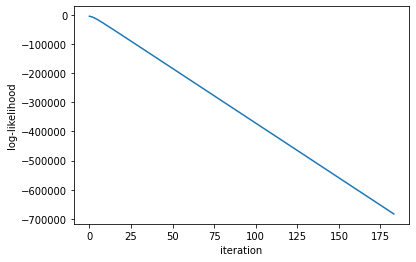

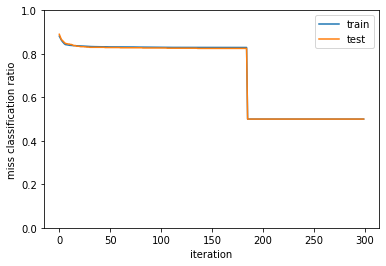

In [13]:
## Problem A ##
xTr=np.loadtxt(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning/data/Gisette/gisette_train.data")
yTr=np.loadtxt(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning/data/Gisette/gisette_train.labels")
xVal=np.loadtxt(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning/data/Gisette/gisette_valid.data")
yVal=np.loadtxt(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning/data/Gisette/gisette_valid.labels")
lr=logisticRegression(xTr, yTr, xVal, yVal)
loglike, misclassTr, misclassVal=lr.train()
# plot the graph
plotGraph(loglike, misclassTr, misclassVal)

finish loading data
finish preprocessing data
0 loglike, miss classification err in train, val:  -421.9844846693975 0.5165016501650165 0.504950495049505
1 loglike, miss classification err in train, val:  -472.21644435025735 0.5148514851485149 0.5033003300330032
2 loglike, miss classification err in train, val:  -885.8336164256898 0.5148514851485149 0.5033003300330032
3 loglike, miss classification err in train, val:  -1840.1401759958667 0.5148514851485149 0.5033003300330032
4 loglike, miss classification err in train, val:  -3043.7855350294412 0.5148514851485149 0.5033003300330032
5 loglike, miss classification err in train, val:  -4287.240186680505 0.5148514851485149 0.5033003300330032
6 loglike, miss classification err in train, val:  -5537.557199605935 0.5148514851485149 0.5033003300330032
7 loglike, miss classification err in train, val:  -6790.112344430716 0.5148514851485149 0.5033003300330032
8 loglike, miss classification err in train, val:  -8043.708255989835 0.5148514851485149

77 loglike, miss classification err in train, val:  -94600.5634510041 0.5148514851485149 0.5033003300330032
78 loglike, miss classification err in train, val:  -95854.22202819804 0.5148514851485149 0.5033003300330032
79 loglike, miss classification err in train, val:  -97107.85570875612 0.5148514851485149 0.5033003300330032
80 loglike, miss classification err in train, val:  -98361.46448512057 0.5148514851485149 0.5033003300330032
81 loglike, miss classification err in train, val:  -99615.04835012219 0.5148514851485149 0.5033003300330032
82 loglike, miss classification err in train, val:  -100868.60729696076 0.5148514851485149 0.5033003300330032
83 loglike, miss classification err in train, val:  -102122.14131918657 0.5148514851485149 0.5033003300330032
84 loglike, miss classification err in train, val:  -103375.65041068298 0.5148514851485149 0.5033003300330032
85 loglike, miss classification err in train, val:  -104629.1345656498 0.5148514851485149 0.5033003300330032
86 loglike, miss 

226 loglike, miss classification err in train, val:  -281120.0284290003 0.5148514851485149 0.5033003300330032
227 loglike, miss classification err in train, val:  -282369.9609844169 0.5148514851485149 0.5033003300330032
228 loglike, miss classification err in train, val:  -283619.8685450817 0.5148514851485149 0.5033003300330032
229 loglike, miss classification err in train, val:  -284869.75111148204 0.5148514851485149 0.5033003300330032
230 loglike, miss classification err in train, val:  -286119.6086841058 0.5148514851485149 0.5033003300330032
231 loglike, miss classification err in train, val:  -287369.4412634409 0.5148514851485149 0.5033003300330032
232 loglike, miss classification err in train, val:  -288619.2488499759 0.5148514851485149 0.5033003300330032
233 loglike, miss classification err in train, val:  -289869.0314441996 0.5148514851485149 0.5033003300330032
234 loglike, miss classification err in train, val:  -291118.78904660104 0.5148514851485149 0.5033003300330032
235 logl

C:\Users\18800\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide
C:\Users\18800\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in greater_equal
C:\Users\18800\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in greater_equal


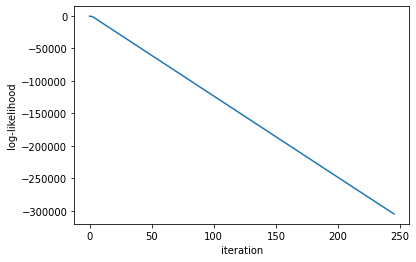

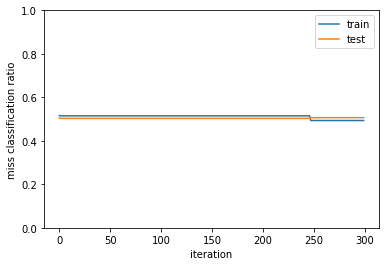

In [19]:
## Problem B ##
xTr=np.loadtxt(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning\Data\hill-valley\X.dat")
yTr=np.loadtxt(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning\Data\hill-valley\Y.dat")
xVal=np.loadtxt(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning\Data\hill-valley\Xtest.dat")
yVal=np.loadtxt(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning\Data\hill-valley\Ytest.dat")
lr=logisticRegression(xTr, yTr, xVal, yVal, eta=0.2)
loglike, misclassTr, misclassVal=lr.train()
# plot the graph
plotGraph(loglike, misclassTr, misclassVal)

finish loading data
finish preprocessing data
0 loglike, miss classification err in train, val:  -493.85653486636824 0.7533333333333333 0.5066666666666666
1 loglike, miss classification err in train, val:  -1182.467144296626 0.7533333333333333 0.5066666666666666
2 loglike, miss classification err in train, val:  -1938.7618281224059 0.7533333333333333 0.5066666666666666
3 loglike, miss classification err in train, val:  -2695.4842486384214 0.7533333333333333 0.5066666666666666
4 loglike, miss classification err in train, val:  -3452.190934631676 0.7533333333333333 0.5066666666666666
5 loglike, miss classification err in train, val:  -4209.8434755320895 0.7533333333333333 0.5066666666666666
6 loglike, miss classification err in train, val:  -4971.874892722848 0.7533333333333333 0.5066666666666666
7 loglike, miss classification err in train, val:  -5748.96609523163 0.7533333333333333 0.5066666666666666
8 loglike, miss classification err in train, val:  -6562.906271326126 0.753333333333333

114 loglike, miss classification err in train, val:  -98850.47571513333 0.7533333333333333 0.5033333333333334
115 loglike, miss classification err in train, val:  -99698.40833680774 0.7533333333333333 0.5033333333333334
116 loglike, miss classification err in train, val:  -100545.91699217103 0.7533333333333333 0.5033333333333334
117 loglike, miss classification err in train, val:  -101393.00189320682 0.7533333333333333 0.5033333333333334
118 loglike, miss classification err in train, val:  -102239.66325179188 0.7533333333333333 0.5033333333333334
119 loglike, miss classification err in train, val:  -103085.90127969767 0.7533333333333333 0.5033333333333334
120 loglike, miss classification err in train, val:  -103931.71618858972 0.7533333333333333 0.5033333333333334
121 loglike, miss classification err in train, val:  -104777.10819002727 0.7533333333333333 0.5033333333333334
122 loglike, miss classification err in train, val:  -105622.07749546388 0.7533333333333333 0.5033333333333334
123

C:\Users\18800\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide
C:\Users\18800\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in greater_equal
C:\Users\18800\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in greater_equal


189 loglike, miss classification err in train, val:  nan 0.5 0.5
190 loglike, miss classification err in train, val:  nan 0.5 0.5
191 loglike, miss classification err in train, val:  nan 0.5 0.5
192 loglike, miss classification err in train, val:  nan 0.5 0.5
193 loglike, miss classification err in train, val:  nan 0.5 0.5
194 loglike, miss classification err in train, val:  nan 0.5 0.5
195 loglike, miss classification err in train, val:  nan 0.5 0.5
196 loglike, miss classification err in train, val:  nan 0.5 0.5
197 loglike, miss classification err in train, val:  nan 0.5 0.5
198 loglike, miss classification err in train, val:  nan 0.5 0.5
199 loglike, miss classification err in train, val:  nan 0.5 0.5
200 loglike, miss classification err in train, val:  nan 0.5 0.5
201 loglike, miss classification err in train, val:  nan 0.5 0.5
202 loglike, miss classification err in train, val:  nan 0.5 0.5
203 loglike, miss classification err in train, val:  nan 0.5 0.5
204 loglike, miss classif

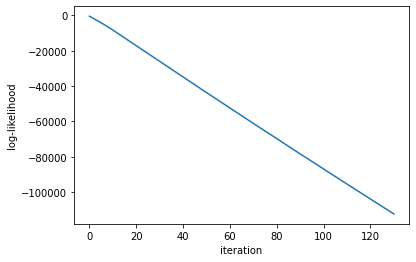

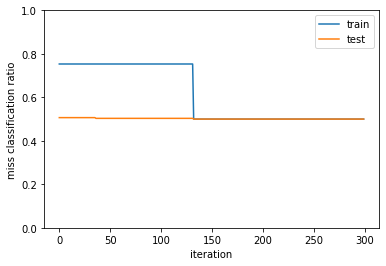

In [29]:
## Problem C ##
xTr=dataFormatTrans(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning/data/dexter/dexter_train.data")
yTr=np.loadtxt(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning/data/dexter/dexter_train.labels")
xVal=dataFormatTrans(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning/data/dexter/dexter_valid.data")
yVal=np.loadtxt(r"C:\Users\18800\Desktop\20 Fall\STA 5635 Applied Machine Learning/data/dexter/dexter_valid.labels")
lr=logisticRegression(xTr, yTr, xVal, yVal, eta=5)
loglike, misclassTr, misclassVal=lr.train()
# plot the graph
plotGraph(loglike, misclassTr, misclassVal)